# Simple PCA Implementation using Numpy
## Introduction
PCA is a dimensionality reduction algorithm which **linearly** reduce the dimention of a dataset.
In other words, PCA works by projecting high-dimensional data to directions with highest variance.
$$
B = \mathbf{x}^TA
$$
Where
$$
A = \begin{bmatrix}
            a_1^{(1)} & a_1^{(2)} & \cdots & a_1^{(N)}\\
            a_2^{(1)} & a_2^{(2)} & \cdots & a_2^{(N)}
\end{bmatrix}, x = \begin{bmatrix}x_1\\x_2\end{bmatrix}
$$
We are going to solve the eigenvalue equation to find the projection vector $\mathbf{x}$ corresponding to largest eigenvalue.
$$
AA^T\mathbf{x} = \lambda\mathbf{x}
$$

## Step 0: setup environment

In [1]:
# numpy is a scientific computing package in python
import numpy as np
# matplotlib is a visulization library in python
import matplotlib.pyplot as plt

## Step 1: read data from `.dat` file
Read `A.dat` using `np.loadtxt()` as matrix $A\in\mathbb{R}^{2\times N}$.
Note that `A.dat` is generated by uniform-distributed data with normal noise.

The shape of matrix A is (2, 50).
Which means that there are 50 datapoints under dimension 2.


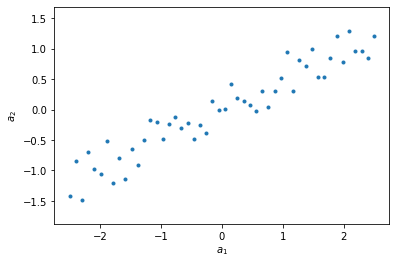

In [2]:
# load data from A.dat
A = np.loadtxt("A.dat")
# output dimension info
print("The shape of matrix A is {}.".format(A.shape))
print("Which means that there are {} datapoints under dimension {}.".format(A.shape[1], A.shape[0]))
# visulazing data points
plt.axis('equal')
plt.plot(A[0, :], A[1, :], ".")
plt.xlabel("$a_1$")
plt.ylabel("$a_2$")
plt.show()

## Step 2: solve eigenvalue equation $AA^T\mathbf{x} = \lambda\mathbf{x}$ and pick up the maximum $\lambda$
Generally, for a symmetric $n\times n$ matrix, $n$ solutions of $\lambda$ would obtained
$$
\lambda_1, \lambda_2, \dots, \lambda_n
$$
Pick the eigenvector $\mathbf{x}$ cooresponds to largest $\lambda$ for dimensionality reduction.

In [3]:
# np.linalg.eigh would return the eigenvalus and eigenvectors for a Hermitian matrix
eig_vals = np.linalg.eigh(A.dot(A.T))[0]
eig_vecs = np.linalg.eigh(A.dot(A.T))[1]
print("The eigenvalues for AA^T is {:.2f} and {:.2f}.".format(*eig_vals))
print("The corresponding eigenvectors are {} and {}.".format(*np.round(eig_vecs, 2)))
print("Thus, we would choose x equals to {} with the largest eigenvalue {:.2f}.".format(np.round(eig_vecs[1], 2), eig_vals[1]))

x = eig_vecs[1]
# ensure norm(x) = 1
x = x / np.linalg.norm(x)
print("The norm of x is {:.2f}.".format(np.linalg.norm(x)))

The eigenvalues for AA^T is 2.14 and 132.76.
The corresponding eigenvectors are [ 0.43 -0.9 ] and [-0.9  -0.43].
Thus, we would choose x equals to [-0.9  -0.43] with the largest eigenvalue 132.76.
The norm of x is 1.00.


## Step 3: project dataset $\mathcal{A}$ onto $\mathbf{x}$ to obtain $\mathcal{B}$, then remap 1-D dataset $\mathcal{B}$ to original 2-D space
Projection
$$
B = \mathbf{x}^TA = \begin{bmatrix}x_1 & x_2\end{bmatrix}\begin{bmatrix}a_1^{(1)} \cdots a_1^{(N)} \\ a_2^{(1)} \cdots a_2^{(N)}\end{bmatrix}
$$
Remap ($\texttt{B2d} = B'$)
$$
B' = \mathbf{x}B = \begin{bmatrix}x_1 \\ x_2\end{bmatrix}\begin{bmatrix}b^{(1)} & \cdots b^{(N)}\end{bmatrix}
$$

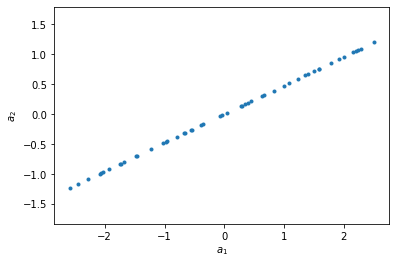

In [4]:
# project A onto x
B = x.reshape([1, -1]).dot(A)
# remap 
B2d = x.reshape([-1, 1]).dot(B)
# visulation of remapped dataset B'
plt.axis('equal')
plt.plot(B2d[0, :], B2d[1, :], ".")
# plt.plot(A[0, :], A[1, :], ".")
plt.xlabel("$a_1$")
plt.ylabel("$a_2$")
plt.show()

## Step 4: compare the reduced dataset to original dataset

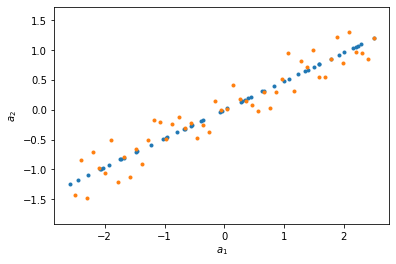

In [5]:
plt.axis('equal')
plt.plot(B2d[0, :], B2d[1, :], ".")
plt.plot(A[0, :], A[1, :], ".")
plt.xlabel("$a_1$")
plt.ylabel("$a_2$")
plt.show()